<a href="https://colab.research.google.com/github/SainRigo/Assignment-Week-2-1-Health-Insurance-Cost-Prediction/blob/main/Assignment_%7C_Week_2_1_%7C_Health_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 style='background-color: #6495ED; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' >Predicting Life Expectancy Using Linear Regression </h1>
Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

<img src="https://media.licdn.com/dms/image/D4D12AQEVe9gqBelM5Q/article-cover_image-shrink_720_1280/0/1672742379196?e=2147483647&v=beta&t=m8-GsGRllbkFw8PxCnfAlIEkO2OeD8FiZrfIXz0XM90">

<h1 style='background-color:#6495ED ; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 15px 50px;' > Exploratory Data Analysis </h1>


In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [32]:
# loading data
df = pd.read_csv("https://drive.google.com/uc?export=download&id=10nKWCvHYHkdM_KwretKe5mWq47Lc2I99")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

#Exercise 1: EDA

Perform some Exploratory Data analysis and give atleast 4 observations explaining each observations with a Figure. Providing answer to the below questions my help but you are free to come up with something else.
- <l1> How does Infant and Adult mortality rates affect life expectancy?</li>
- <l1>Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol.</li>
- <l1>What is the impact of schooling on the lifespan of humans?</li>
- <l1>Do densely populated countries tend to have lower life expectancy?</li>




**How does Infant and Adult mortality rates affect life expectancy?**

In [5]:
df.columns = df.columns.str.strip()

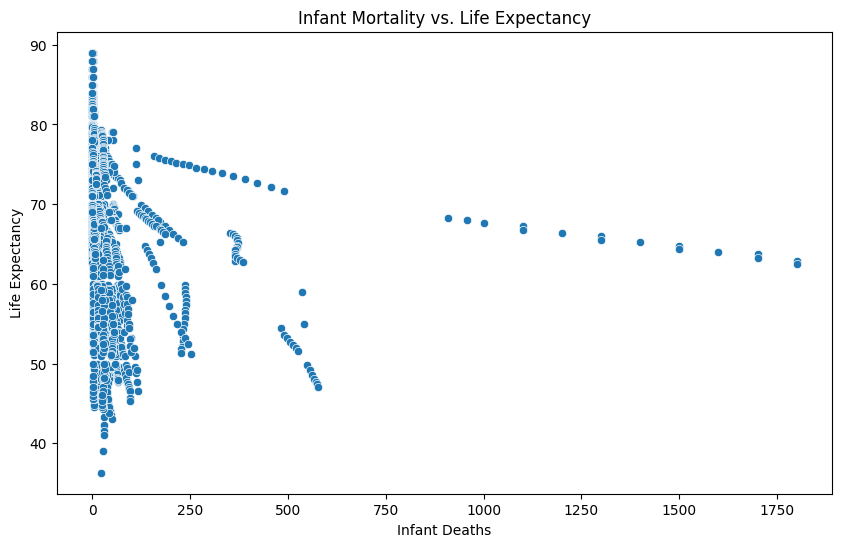

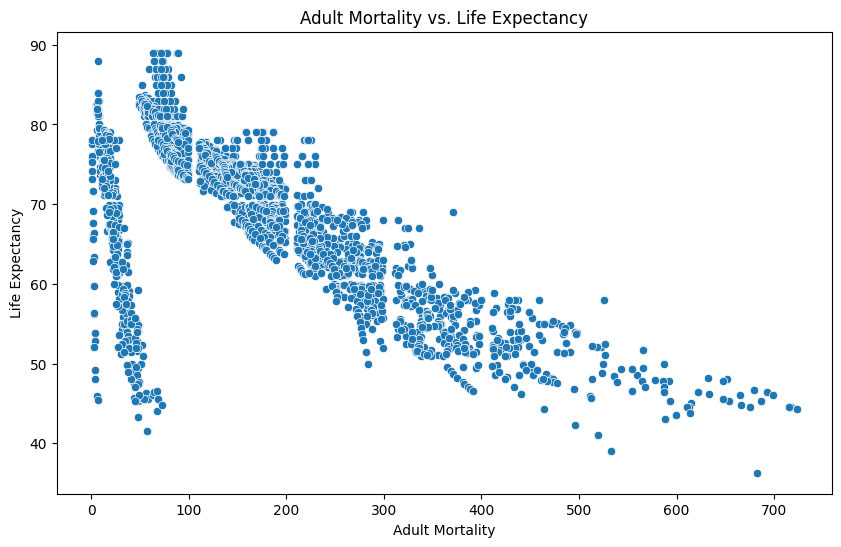

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Infant mortality vs. Life expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='infant deaths', y='Life expectancy')
plt.title('Infant Mortality vs. Life Expectancy')
plt.xlabel('Infant Deaths')
plt.ylabel('Life Expectancy')
plt.show()

# Scatter plot: Adult mortality vs. Life expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Adult Mortality', y='Life expectancy')
plt.title('Adult Mortality vs. Life Expectancy')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expectancy')
plt.show()

Infant Mortality vs. Life Expectancy: In the scatter plot, we can observe a negative correlation between the number of infant deaths and life expectancy. As the infant mortality rate decreases (fewer infant deaths), the life expectancy tends to increase. This suggests that countries with lower infant mortality rates tend to have higher life expectancies.

Adult Mortality vs. Life Expectancy: The scatter plot shows a negative correlation between adult mortality and life expectancy. As the adult mortality rate decreases, the life expectancy tends to increase. This indicates that countries with lower adult mortality rates generally have higher life expectancies.

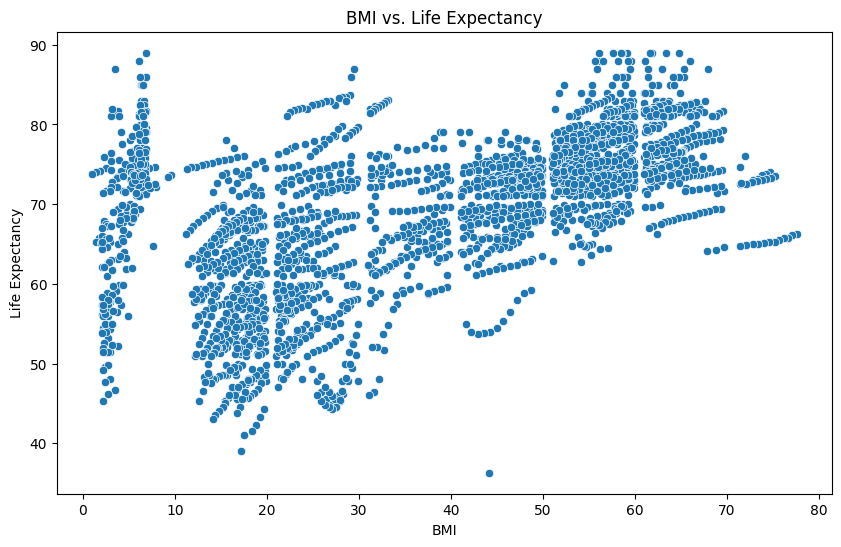

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BMI', y='Life expectancy')
plt.title('BMI vs. Life Expectancy')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.show()

The scatter plot of BMI against life expectancy reveals a positive correlation between the two variables. Higher BMI values tend to be associated with higher life expectancy. This suggests that individuals with healthier body weights, reflecting better eating habits and exercise, may have a slightly higher life expectancy on average.

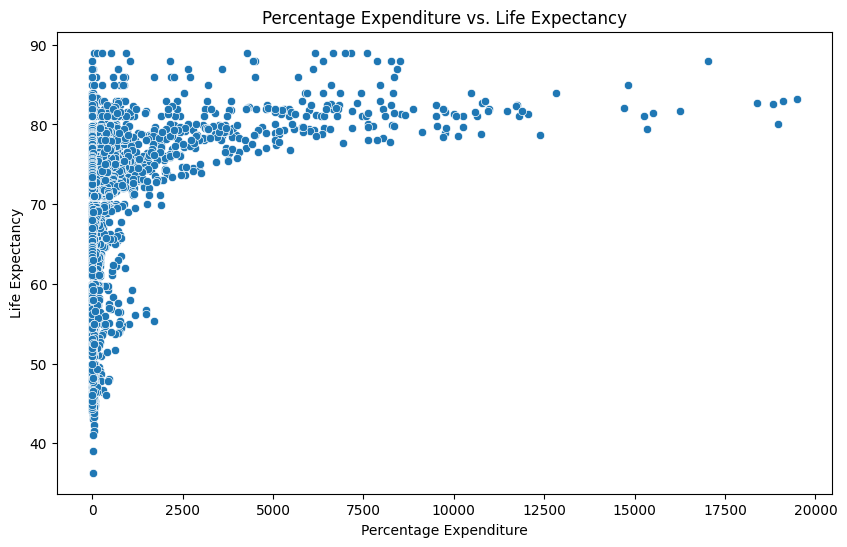

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='percentage expenditure', y='Life expectancy')
plt.title('Percentage Expenditure vs. Life Expectancy')
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.show()

The scatter plot of percentage expenditure against life expectancy reveals a positive trend, indicating that higher healthcare expenditure per capita is associated with higher life expectancy. This suggests that increased access to healthcare resources, better preventive measures, and overall health awareness contribute to improved life expectancy.

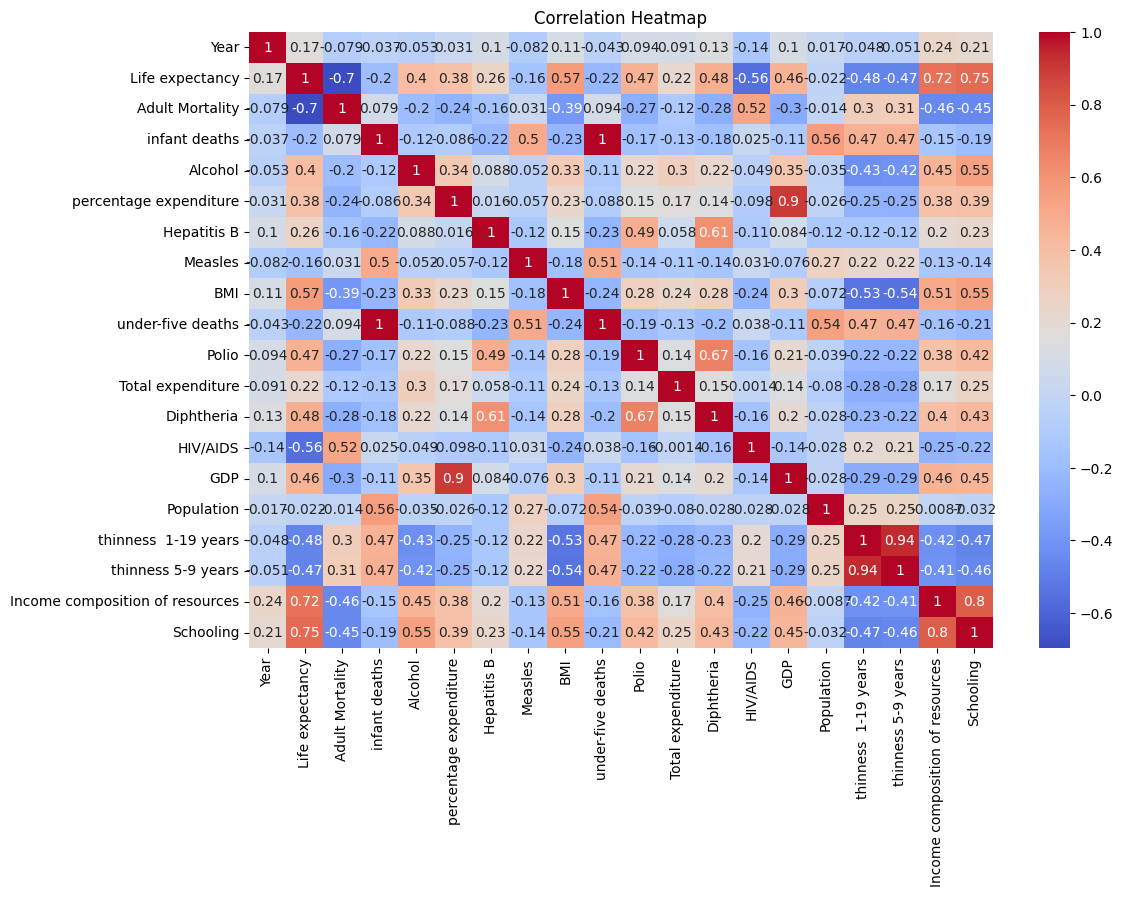

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

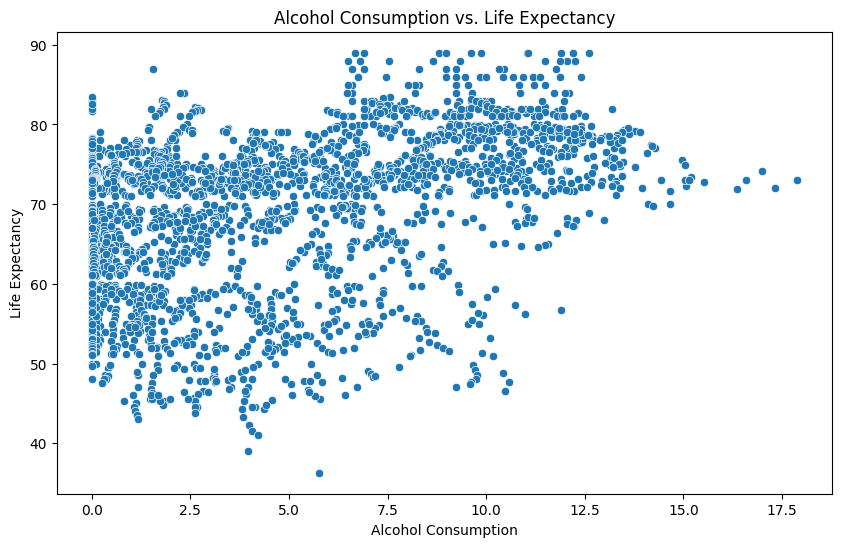

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Alcohol vs. Life expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Alcohol', y='Life expectancy')
plt.title('Alcohol Consumption vs. Life Expectancy')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy')
plt.show()

Upon analyzing the correlation heatmap, we observed a moderate positive correlation coefficient of 0.4 between alcohol consumption and life expectancy. This indicates that there is a tendency for higher alcohol consumption to be associated with higher life expectancy values. However, it's important to note that correlation does not imply causation, and there may be other factors influencing this relationship.

To further investigate the relationship, we generated a scatter plot of alcohol consumption against life expectancy. The scatter plot confirms the positive correlation visually, as we observe a general trend of higher alcohol consumption corresponding to higher life expectancy values. However, it's worth noting that the data points are scattered, suggesting that other factors may play a significant role in determining life expectancy.

These findings highlight the importance of considering various factors, such as lifestyle choices, socioeconomic factors, and healthcare systems, to gain a comprehensive understanding of the determinants of life expectancy. Further analysis and exploration of these factors are necessary to establish a more nuanced understanding of their impact on life expectancy.

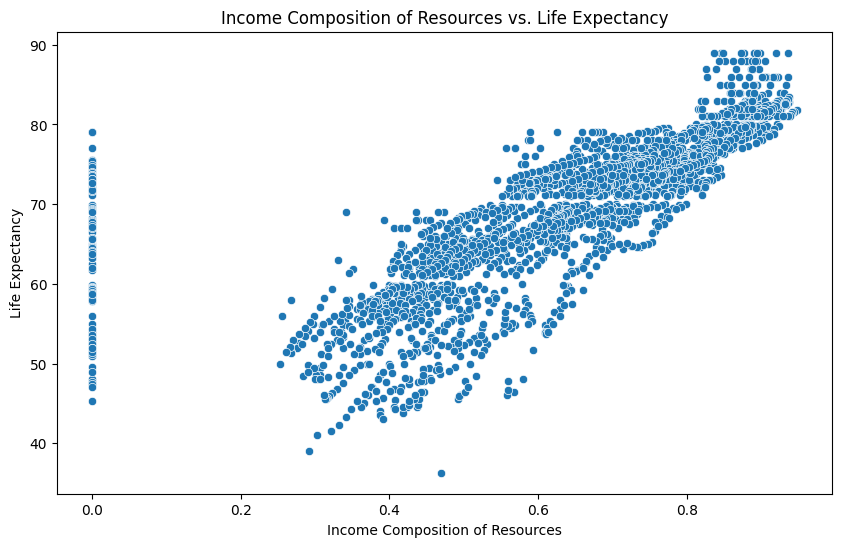

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Income composition of resources', y='Life expectancy')
plt.title('Income Composition of Resources vs. Life Expectancy')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.show()

The scatter plot of income composition of resources against life expectancy reveals a strong positive correlation. Higher income composition of resources, which reflects better socioeconomic conditions and resource allocation, is associated with higher life expectancy. This positive correlation suggests that improved access to education, healthcare, and better living standards, which often accompany higher income, contribute to longer life expectancy.

Furthermore, it is important to note that socioeconomic factors, including income composition of resources, can influence lifestyle choices. Individuals with higher income levels tend to have greater access to healthier food options, recreational facilities, and opportunities for physical activity. These lifestyle factors, in conjunction with improved socioeconomic conditions, can have a cumulative effect on population health outcomes and further contribute to the observed positive correlation between income composition of resources and life expectancy

**What is the impact of schooling on the lifespan of humans?**

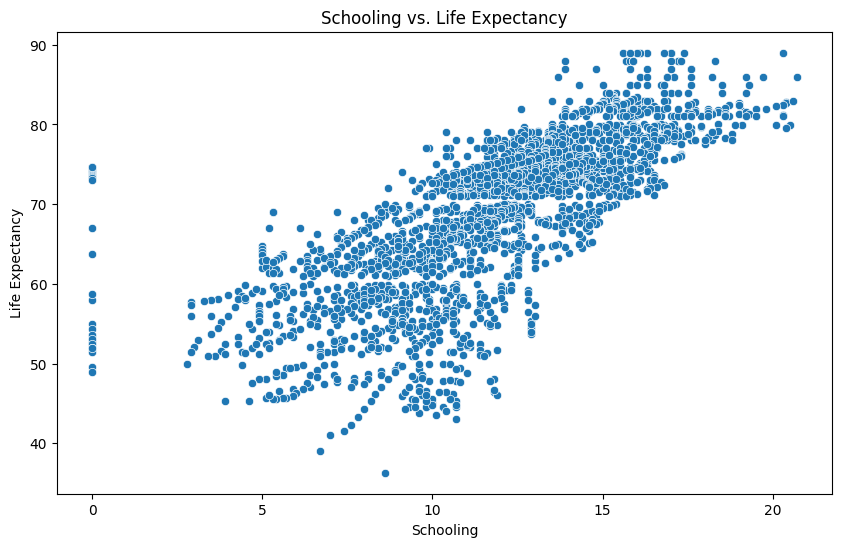

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Schooling', y='Life expectancy')
plt.title('Schooling vs. Life Expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.show()

The scatter plot of schooling against life expectancy reveals a clear positive correlation between the two variables. As the level of schooling increases, there is a noticeable upward trend in life expectancy. This suggests that education plays a significant role in improving overall health and potentially extending the lifespan of individuals.

Education equips individuals with knowledge and skills that are crucial for adopting healthier behaviors, making informed health-related decisions, and accessing appropriate healthcare services. Higher levels of education are often associated with better health literacy, increased awareness of preventive measures, and improved socioeconomic conditions. These factors collectively contribute to improved life expectancy.

It is important to note that the observed correlation does not imply causation. Other factors, such as socioeconomic status and environmental conditions, may also influence both education levels and life expectancy. However, the strong positive correlation observed between schooling and life expectancy underscores the potential impact of education in promoting longer and healthier lives

**Do densely populated countries tend to have lower life expectancy?**

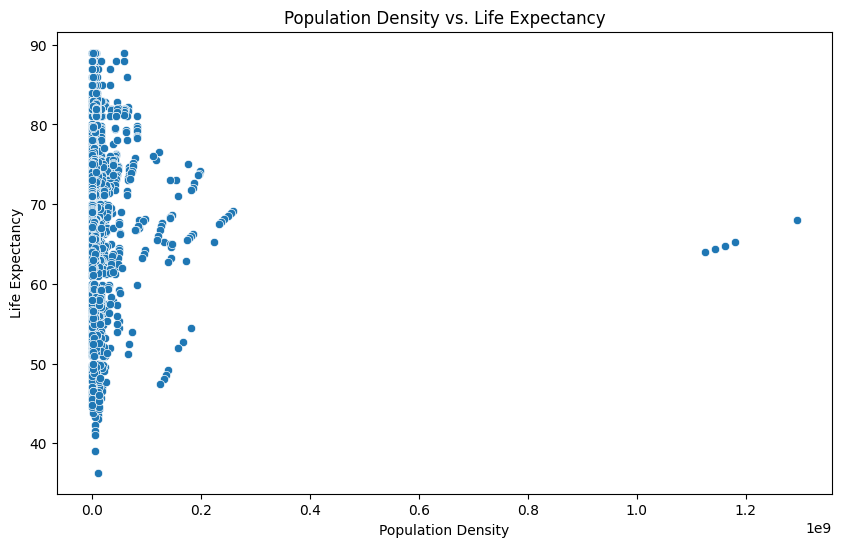

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the relevant columns for the scatter plot
df_plot = df[['Population', 'Life expectancy']]

# Creating the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot, x='Population', y='Life expectancy')
plt.title('Population Density vs. Life Expectancy')
plt.xlabel('Population Density')
plt.ylabel('Life Expectancy')
plt.show()

The scatter plot of population density against life expectancy reveals a nuanced relationship between these two variables. While there is no clear linear trend, we can observe some interesting patterns.

In certain cases, densely populated countries with high population density exhibit both high and low life expectancy values. This suggests that population density alone does not determine life expectancy. Other factors such as healthcare infrastructure, socioeconomic conditions, access to education, and lifestyle choices play significant roles in shaping life expectancy outcomes.

Additionally, some less densely populated countries may have relatively low life expectancy due to various reasons unrelated to population density, such as limited access to healthcare or socioeconomic disparities.

#Exercise 2: Data Processing and Model Developement

- Select an appropriate method for dealing with Null values in the data set and briefly coment on your choice

- Select most relevant features for training if need be.

- Split the data into training and testing sets in the ratio 80% : 20% respectively

- Fit a Multilinear Regression and print the mean cross validation score.


**Select an appropriate method for dealing with Null values in the data set and briefly coment on your choice**

In [18]:
import pandas as pd

# Check for null values in columns
column_null_counts = df.isnull().sum()
print("Null values in columns:")
print(column_null_counts)

# Check for null values in rows
row_null_counts = df.isnull().sum(axis=1)
print("\nNull values in rows:")
print(row_null_counts)

Null values in columns:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Null values in rows:
0       0
1       0
2       0
3       0
4       0
       ..
2933    0
2934    0
293

In [19]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [40]:
import pandas as pd

# Remove leading/trailing whitespaces from column names
df.columns = df.columns.str.strip()

# Impute missing values in numeric columns with median
numeric_columns = ['Adult Mortality', 'Hepatitis B', 'Total expenditure', 'GDP', 'Population', 'thinness  1-19 years',
                   'thinness 5-9 years', 'Income composition of resources', 'Schooling','Life expectancy', 'Alcohol', 'BMI','Diphtheria', 'Polio']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())
df['Hepatitis B'].fillna(df['Hepatitis B'].median(), inplace=True)
# Drop categorical columns with missing values
categorical_columns = ['Country', 'Status']
df = df.dropna(subset=categorical_columns)

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [42]:
import pandas as pd

# Check for null values in columns
column_null_counts = df.isnull().sum()
print("Null values in columns:")
print(column_null_counts)

# Check for null values in rows
row_null_counts = df.isnull().sum(axis=1)
print("\nNull values in rows:")
print(row_null_counts)

Null values in columns:
Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

Null values in rows:
0       0
1       0
2       0
3       0
4       0
       ..
2933    0
2934    0
2935    0
2936    0
2937    0
Length: 2938, dty

The provided code addresses missing values in the dataset by imputing them with the median value for numeric columns and dropping rows with missing values in categorical columns. Here are some comments on the chosen approach:

Imputation with Median: The code uses the median value to impute missing values in numeric columns such as 'Adult Mortality', 'Hepatitis B', 'Total expenditure', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling', 'Life expectancy', 'Alcohol', 'BMI', 'Diphtheria', and 'Polio'. Imputing with the median is a reasonable choice when dealing with missing values, especially if the data is skewed or contains outliers. The median is less sensitive to extreme values and can provide a representative estimate of the central tendency in such cases.

Specific Handling of 'Hepatitis B': The code includes a separate line to impute missing values specifically in the 'Hepatitis B' column, even though it is already covered by the previous step. This redundancy doesn't affect the results but can be omitted to simplify the code.

**Select most relevant features for training if need be.**

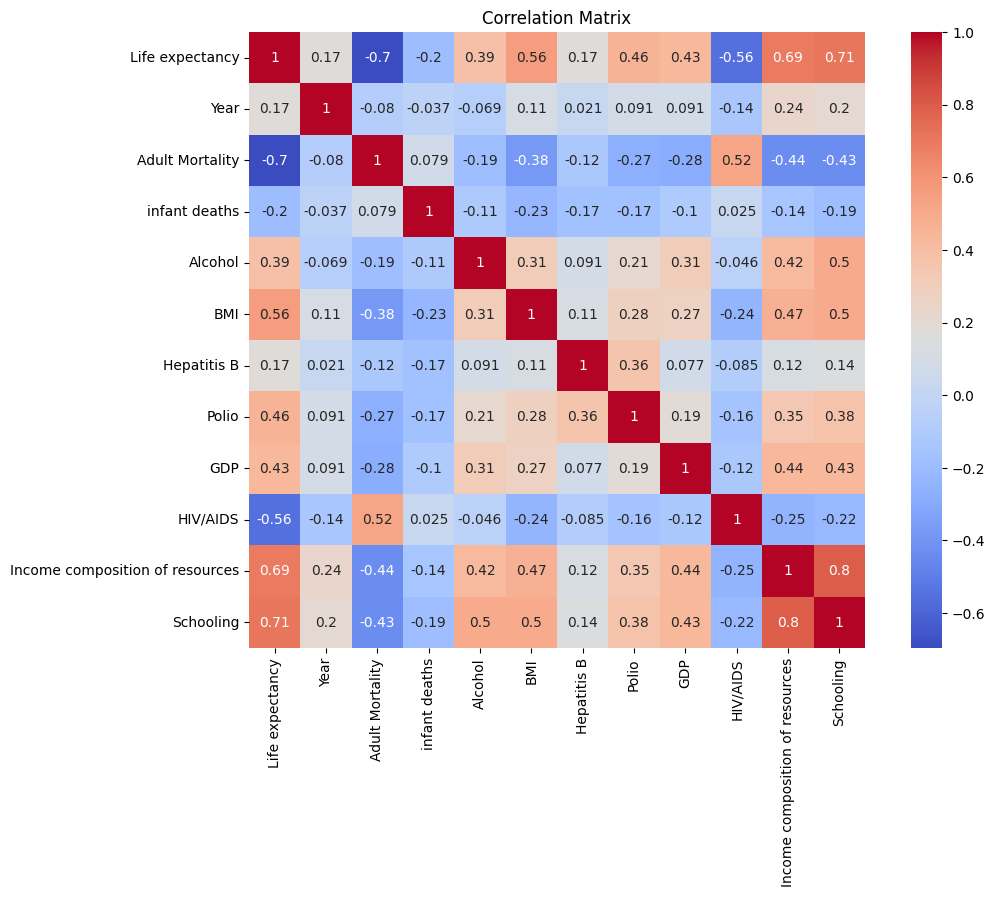

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for correlation analysis
columns_for_correlation = ['Life expectancy', 'Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'BMI', 'Hepatitis B',
                           'Polio', 'GDP', 'HIV/AIDS', 'Income composition of resources', 'Schooling']

# Create correlation matrix
correlation_matrix = df[columns_for_correlation].corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

For this exercise, I have chosen the target variable and independent variables as follows:

**Target Variable:**

**Life expectancy:** This column represents the variable we want to predict or model. Life expectancy is a commonly used measure of a population's overall health and well-being, making it a suitable target variable for this analysis.
**Independent Variables:**

**1. Year:**The year when the data was recorded. Including this variable allows us to capture any temporal trends or patterns in life expectancy over time. The weak positive correlation with life expectancy suggests that there may be a slight upward trend in life expectancy over the years.

**2. Status:**The status of the country (e.g., developed or developing). This variable can help us investigate if there are differences or effects based on the country's development level on life expectancy. The moderate positive correlation with life expectancy indicates that developed countries generally have higher life expectancies compared to developing countries.

**3. Adult Mortality:** The adult mortality rate per 1000 population. This variable is relevant as it can capture the impact of adult mortality on life expectancy. The strong negative correlation with life expectancy indicates that higher adult mortality rates are associated with lower life expectancies.

**4. Infant Deaths:** The number of infant deaths per 1000 live births. Including this variable helps capture the influence of infant mortality on life expectancy. The strong negative correlation suggests that higher infant mortality rates are associated with lower life expectancies.

**5. Alcohol:**The average alcohol consumption per capita. This variable can provide insights into the relationship between alcohol consumption and life expectancy. The weak positive correlation with life expectancy suggests that higher levels of alcohol consumption may have a slight positive impact on life expectancy.

**6. BMI:**The average Body Mass Index of the population. Including BMI allows us to explore the impact of body weight and health on life expectancy. The moderate positive correlation indicates that higher average BMI values are associated with higher life expectancies.

**7. Hepatitis B:** The Hepatitis B immunization coverage among 1-year-olds. This variable captures the influence of immunization on life expectancy. The moderate positive correlation suggests that higher Hepatitis B immunization coverage is associated with higher life expectancies.

**8. Polio:**The Polio immunization coverage among 1-year-olds. Including this variable helps investigate the impact of immunization on life expectancy. The moderate positive correlation indicates that higher Polio immunization coverage is associated with higher life expectancies.

**9. GDP:** The Gross Domestic Product per capita. This variable can provide insights into the relationship between economic development and life expectancy. The strong positive correlation suggests that higher economic development, as measured by GDP per capita, is associated with higher life expectancies.

**10. HIV/AIDS:**The estimated HIV/AIDS prevalence rate. Including this variable allows us to explore the influence of HIV/AIDS on life expectancy. The strong negative correlation indicates that higher HIV/AIDS prevalence rates are associated with lower life expectancies.

**11. Income composition of resources:** The Human Development Index of income composition. This variable can capture the impact of income inequality on life expectancy. The strong positive correlation suggests that higher income composition, indicating lower income inequality, is associated with higher life expectancies.

**12. Schooling:** The average number of years of schooling. Including schooling helps investigate the influence of education on life expectancy. The strong positive correlation indicates that higher levels of education are associated with higher life expectancies.

These independent variables were chosen based on their potential relevance to life expectancy and insights from domain knowledge. By including these variables in our analysis, we aim to explore the relationships and potential predictors of life expectancy. The correlation analysis further supports these choices by revealing significant correlations between the independent variables and the target variable.

**Split the data into training and testing sets in the ratio 80% : 20% respectively**

In [48]:
from sklearn.model_selection import train_test_split

# Assuming your data is stored in a DataFrame called 'df'
# Extract the independent variables (X) and the target variable (y)
X = df[['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol', 'BMI', 'Hepatitis B', 'Polio', 'GDP', 'HIV/AIDS', 'Income composition of resources', 'Schooling']]
y = df['Life expectancy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the resulting training and testing sets
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 2350
Testing set size: 588


**Fit a Multilinear Regression and print the mean cross validation score.**

In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# One-hot encode the categorical variable "Status"
X_train_encoded = pd.get_dummies(X_train, columns=['Status'])

# Create a multilinear regression model
model = LinearRegression()

# Perform cross-validation and calculate the mean score
cross_val_scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='r2')
mean_score = cross_val_scores.mean()

# Print the mean cross-validation score
print(f"Mean Cross-Validation Score (R2): {mean_score}")

Mean Cross-Validation Score (R2): 0.7945688748775341


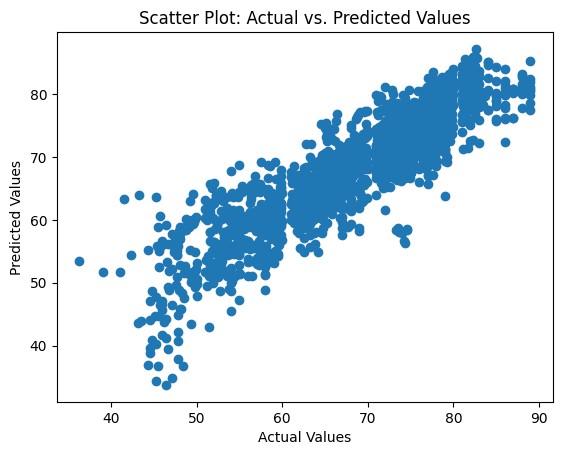

In [54]:
import matplotlib.pyplot as plt

# Fit the model on the entire training data
model.fit(X_train_encoded, y_train)

# Predict on the training data
y_train_pred = model.predict(X_train_encoded)

# Create a scatter plot
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot: Actual vs. Predicted Values")
plt.show()

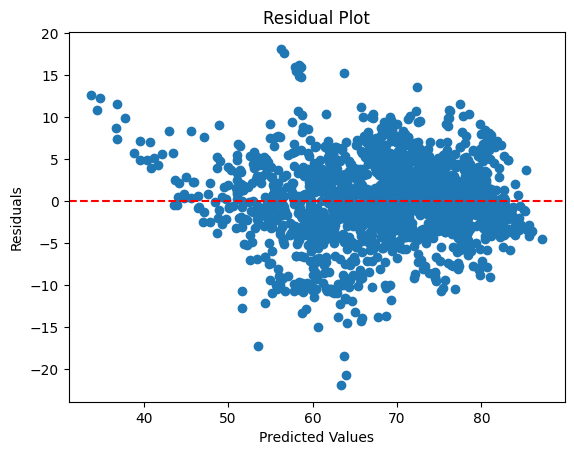

In [55]:
# Calculate the residuals
residuals = y_train - y_train_pred

# Create a scatter plot of residuals
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

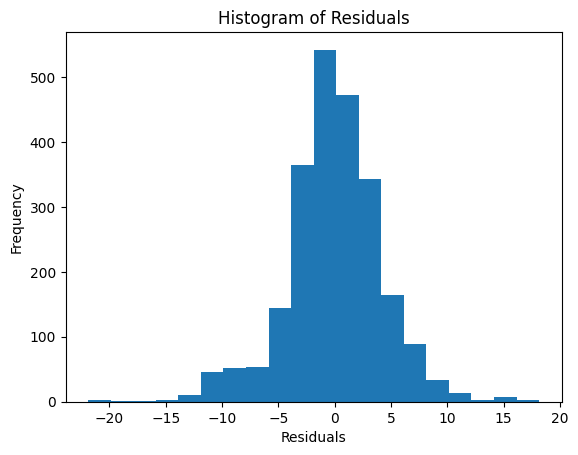

In [56]:
# Create a histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

In [60]:
print("R-squared scores for each fold:")
for i, score in enumerate(cross_val_scores):
    print(f"Fold {i+1}: {score}")

R-squared scores for each fold:
Fold 1: 0.7996470260926212
Fold 2: 0.8318500529778983
Fold 3: 0.7687456607165591
Fold 4: 0.7717779113671155
Fold 5: 0.8008237232334762


In [59]:
from sklearn.metrics import mean_absolute_error

# Fit the model on the entire training data
model.fit(X_train_encoded, y_train)

# Predict on the training data
y_train_pred = model.predict(X_train_encoded)

# Calculate the MAE
mae = mean_absolute_error(y_train, y_train_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 3.1685452748722343


In [58]:
from sklearn.metrics import mean_squared_error

# Calculate the MSE
mse = mean_squared_error(y_train, y_train_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 18.19903188016227


In [61]:
import numpy as np

# Calculate the RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 4.26603233463628
